In [197]:
#import pandas and numpy libraries

import numpy as np
import pandas as pd
#read the csv files using pandas

training_df = pd.read_csv("churnTrain.csv")
testing_df = pd.read_csv("churnTest.csv")


                                            TELECOM CHURN ANALYTICS USING LOGISTIC REGRESSION AND NEURAL NETWORK MODELS                                                                                         

The dataset is a collection of customer information from a telecommunications company, likely used for predicting customer churn. It contains a mix of categorical and numerical features.

                                                    FEATURES                                                                                                                
CATEGORICAL FEATURES:

State: Customer's state of residence.

Area_Code: Area code of the customer's phone number.

International_Plan: Indicates whether the customer has an international plan (binary).

Voice_Mail_Plan: Indicates whether the customer has a voicemail plan (binary).

Churn: Target variable indicating whether the customer churned (binary).



NUMERICAL FEATURES

Account_Length: Duration of the customer's account.
Phone_No: Customer's phone number.

No_Vmail_Messages: Number of voicemail messages.

Total_Day_minutes, Total_Day_Calls, Total_Day_charge: Total day minutes used, number of day calls, and total day charge.

Total_Eve_minutes, Total_Eve_Calls, Total_Eve_Charge: Total evening minutes used, number of evening calls, and total evening charge.

Total_Night_minutes, Total_Night_Calls, Total_Night_Charge: Total night minutes used, number of night calls, and total night charge.

Total_Intl_Minutes, Total_Intl_Calls, Total_Intl_Charge: Total international minutes used, number of international calls, and total international charge.

No_CS_Calls: Number of customer service calls.



In [198]:
#display first five rows of training dataframe
training_df.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


EXPLORATORY DATA ANALYSIS

In [199]:
#Check missing Values

null_in_trainset =training_df.isnull().sum()
print (f"Null values in training dataset are as follows: {null_in_trainset}")


Null values in training dataset are as follows: State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64


In [200]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                3333 non-null   object 
 1   Account_Length       3333 non-null   int64  
 2   Area_Code            3333 non-null   int64  
 3   Phone_No             3333 non-null   int64  
 4   International_Plan   3333 non-null   object 
 5   Voice_Mail_Plan      3333 non-null   object 
 6   No_Vmail_Messages    3333 non-null   int64  
 7   Total_Day_minutes    3333 non-null   float64
 8   Total_Day_Calls      3333 non-null   int64  
 9   Total_Day_charge     3333 non-null   float64
 10  Total_Eve_Minutes    3333 non-null   float64
 11  Total_Eve_Calls      3333 non-null   int64  
 12  Total_Eve_Charge     3333 non-null   float64
 13  Total_Night_Minutes  3333 non-null   float64
 14  Total_Night_Calls    3333 non-null   int64  
 15  Total_Night_Charge   3333 non-null   f

In [201]:
training_df.describe()

,Account_Length,Area_Code,Phone_No,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,Total_Eve_Minutes,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,2.746626e+05,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,4.229964e+06,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


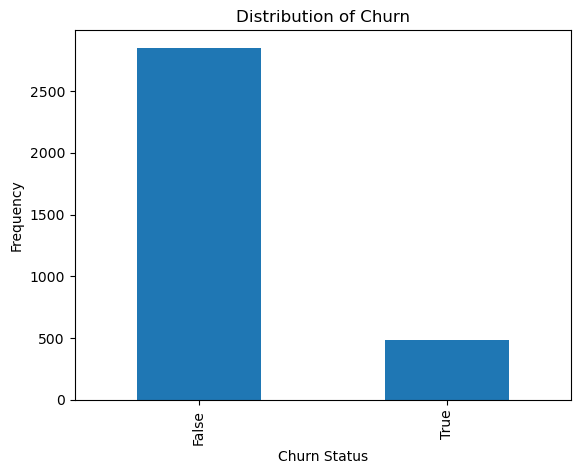

In [202]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming churn_values is a Series
churn_values = training_df['Churn'].value_counts()
# Plotting
churn_values.plot.bar()
# Show the plot
plt.title("Distribution of Churn")
plt.xlabel("Churn Status")
plt.ylabel("Frequency")
plt.show()


 The bar chart represents the distribution of churn status. The chart indicates a significant imbalance, with a much higher frequency of customers who did not churn (False) compared to those who did churn (True).

Text(0, 0.5, 'Frequency')

<Figure size 800x600 with 0 Axes>

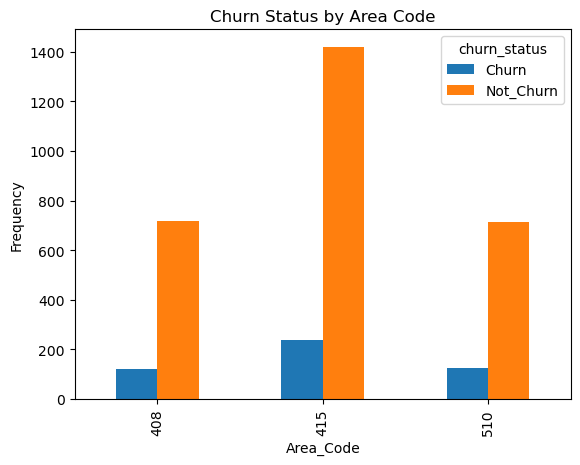

In [203]:
training_df.head()
import seaborn as sns
import plotly.express as px

# Create 'churn_status' column
training_df['churn_status'] = training_df['Churn'].apply(lambda x: "Churn" if x == True else "Not_Churn")

# Group by 'Area_Code' and 'churn_status'
churn_area_freq = training_df.groupby(['Area_Code', 'churn_status']).size().unstack()

# Plotting
plt.figure (figsize=(8, 6))

# Plotting the bar plot for Churn and Not_Churn side by side
churn_area_freq.plot(kind='bar', stacked=False)
plt.title('Churn Status by Area Code')
plt.ylabel('Frequency')

According to the bar chart above, Area code 415 has the highest overall number of customers, with a relatively higher proportion of churned customers compared to the other two area codes.

In [204]:

#grouping churn status with State
churn_state_freq = training_df.groupby(['State', 'churn_status']).size().reset_index(name='Count')

# Plotting with plotly.express
fig = px.bar(
    churn_state_freq,
    x='State',
    y='Count',
    color='churn_status',
    barmode='group',
    title='Distribution of Churn according to State',
    labels={'Count': 'Count', 'State': 'State'}
)

# Customize the layout
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Count',
    title_font_size=20,
    xaxis_tickangle=-90,
    legend_title_text='Churn Status',
    width=1000,  # Set the width of the plot
    height=600   # Set the height of the plot
)

fig.show()

In [205]:
correlation_acclen_churn = training_df[['Account_Length', 'churn_status']].corr
fig = px.scatter(training_df, x= 'churn_status', y = 'Account_Length', size = 'Account_Length', color= 'churn_status')
fig.show()


<Axes: xlabel='International_Plan'>

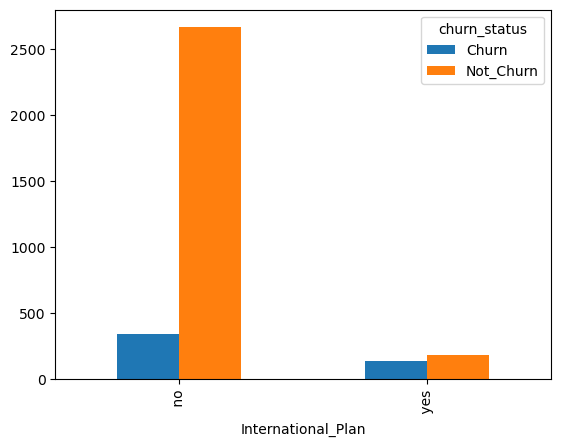

In [206]:
training_df.head()
plan_churn = training_df.groupby('International_Plan')['churn_status'].value_counts().unstack()

plan_churn.plot(kind ='bar', stacked = False)


The bar chart compares the number of customers who churned and did not churn based on whether they have an international plan. Customers without an international plan are significantly more likely to churn than those with one.

<Axes: xlabel='Voice_Mail_Plan'>

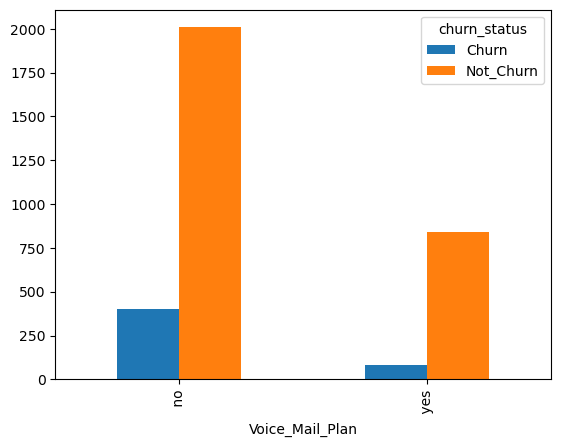

In [207]:
voice_mail_churn = training_df.groupby('Voice_Mail_Plan')['churn_status'].value_counts().unstack()
voice_mail_churn.plot(kind ='bar', stacked=False)

The bar chart compares churn rates for customers with and without voicemail plans. Customers without voicemail plans are significantly more likely to churn than those with voicemail plans.

In [208]:
import plotly.express as px
cols= training_df.columns.values[6:20]
averages=training_df.groupby('churn_status')[cols].mean().reset_index()
fig.update_layout(
    title='Averages of all parameters',
    xaxis_title='Churn status',
    yaxis_title='Parameters',
    width=1000,
    height=800
)

fig.show()

The image displays a bar chart comparing various numerical variables between customers who churned and those who did not. Customers who churned generally have higher values for most variables, particularly in call minutes, calls made, and charges.

DATA PREPROCESSING

In [209]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
encoder = LabelEncoder()

# Encoding 'State' and 'churn_status' columns separately
training_df['State'] = encoder.fit_transform(training_df['State'])
training_df['churn_status'] = encoder.fit_transform(training_df['churn_status'])
training_df['International_Plan'] = encoder.fit_transform(training_df['International_Plan'])
training_df['Voice_Mail_Plan'] = encoder.fit_transform(training_df['Voice_Mail_Plan'])
training_df.head()

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn,churn_status
0,16,128,415,3824657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1
1,35,107,415,3717191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1
2,31,137,415,3581921,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1
3,35,84,408,3759999,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1
4,36,75,415,3306626,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1


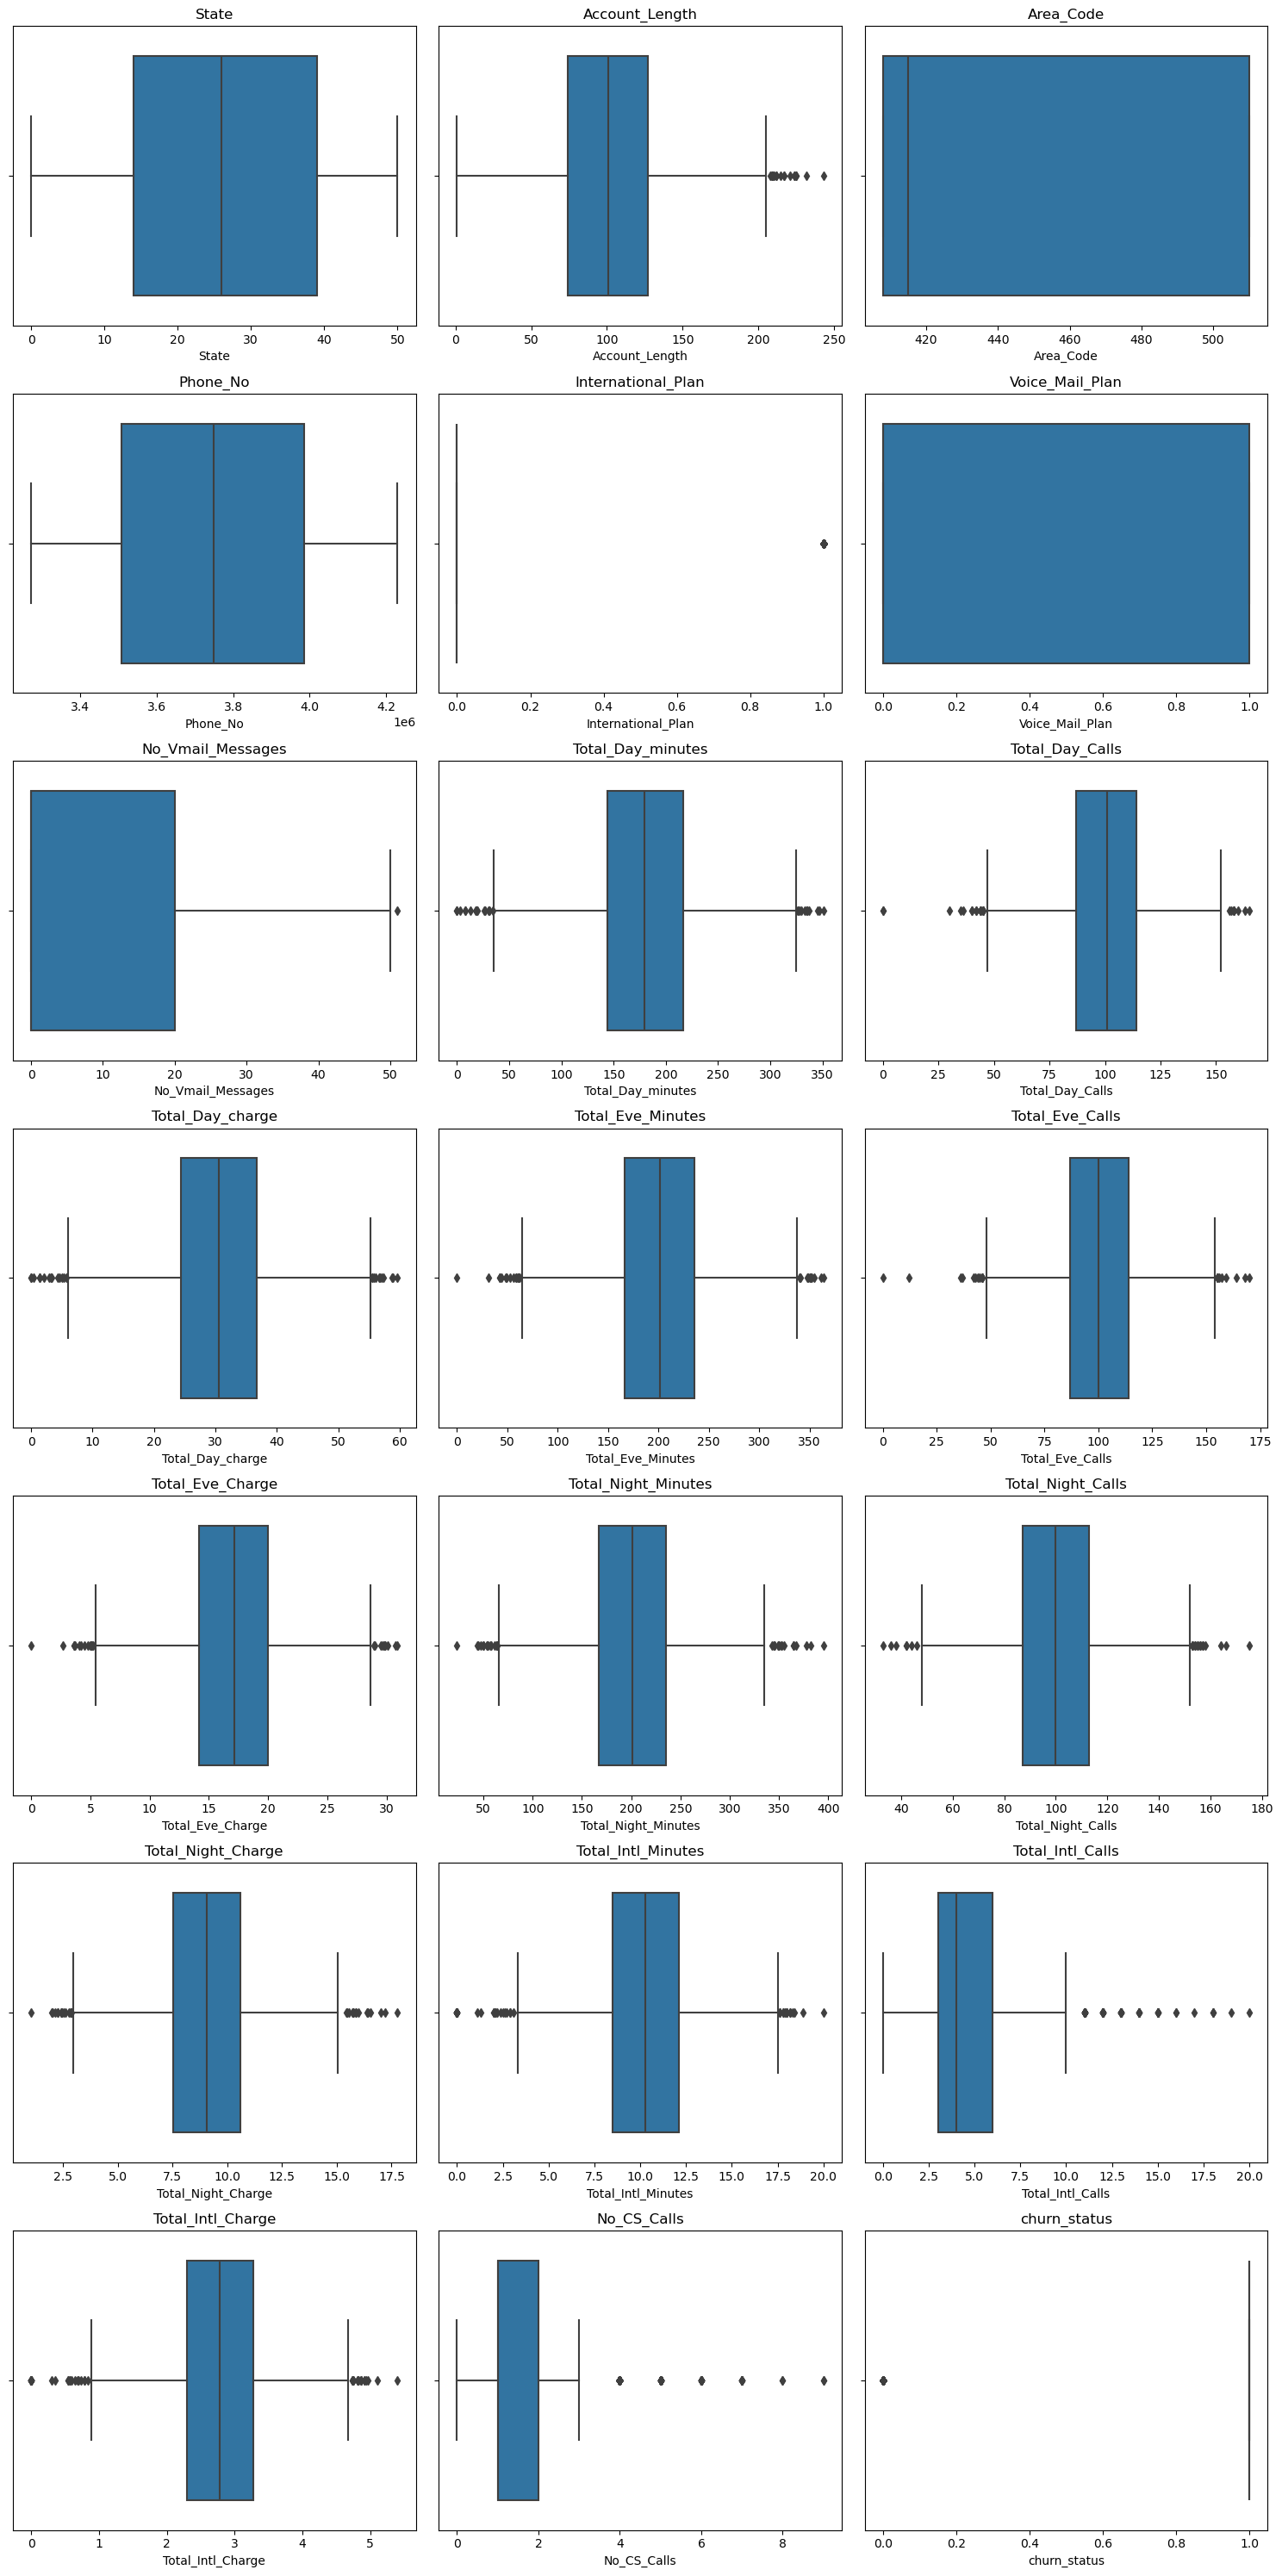

In [223]:
numeric_df = training_df.select_dtypes(include='number')

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numeric column
for idx, col in enumerate(numeric_df.columns):
    sns.boxplot(data=numeric_df, x=col, ax=axes[idx])
    axes[idx].set_title(col)

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Outliers are present in several features. These are represented by the individual data points outside the whiskers of the box plots. The features with the most prominent outliers include:   

Total Day Minutes,
Total Eve Minutes,
Total Night Minutes,
Total Intl Minutes,
Total Day Calls,
Total Eve Calls,
Total Night Calls,
Total Intl Calls.
These outliers suggest unusual usage patterns for a subset of customers, which warrants further investigation or potential treatment

In [224]:
print (f'Prior to removal of outlier = {training_df.shape}')
def outlier_remover (training_df, col_names):
    for col in col_names:
        Q1 = training_df[col].quantile (0.25)
        Q3 = training_df[col].quantile (0.75)
        IQR = Q3- Q1
        
        lower_range = Q1 -1.5*IQR
        upper_range = Q3 + 1.5*IQR
        clean_df = training_df.loc[(training_df[col] > lower_range) & (training_df[col] < upper_range)]
    return clean_df

clean_df = outlier_remover (training_df, ['State', 'Account_Length', 'Area_Code', 'Phone_No', 'No_Vmail_Messages',
       'Total_Day_Calls', 'Total_Day_charge', 'Total_Eve_Calls',
       'Total_Eve_Charge', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Calls', 'Total_Intl_Charge', 'No_CS_Calls'])
print (f"After the removal of outliers= {clean_df.shape}")



Prior to removal of outlier = (3333, 22)
After the removal of outliers= (3066, 22)


FEATURE ENGINEERING

In [225]:
import plotly.graph_objects as go

# Assuming 'correlation' is your correlation matrix
fig = go.Figure(data=go.Heatmap(z=correlation.values,
                                x=correlation.columns,
                                y=correlation.index,
                                colorscale='RdGy'))

fig.update_layout(title='Correlation Heatmap',
                  xaxis_nticks=36 ,width =1000, height = 800)

fig.show()


LOGISTIC MODELLING

In [251]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X= clean_df.drop(columns =['churn_status', 'Churn'], axis=1)
y= clean_df ['churn_status']

#train and split datasets
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size= 0.30 , random_state=42)


#feature selection using Chi-squared test
chi_selector = SelectKBest(chi2, k= 15)
X_train_chi = chi_selector.fit_transform (X_train,y_train)

#get the indices of selected features
selected_features = chi_selector.get_support(indices=True)
print(clean_df.columns[selected_features])

Index(['State', 'Account_Length', 'Phone_No', 'International_Plan',
       'Voice_Mail_Plan', 'No_Vmail_Messages', 'Total_Day_minutes',
       'Total_Day_charge', 'Total_Eve_Minutes', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Charge', 'Total_Intl_Minutes',
       'Total_Intl_Calls', 'Total_Intl_Charge'],
      dtype='object')


REDUCE OVERSAMPLING USING SMOTEENN

In [252]:
#print the oversampled data
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1926
Before OverSampling, counts of label '0': 220


In [253]:
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Assuming X_train_chi, y_train, X_test, and y_test are already defined

# Feature selection
selector = SelectKBest(chi2, k=15)
X_train_chi = selector.fit_transform(X_train, y_train)
X_test_chi = selector.transform(X_test)

# Combine SMOTE with Nearest Neighbours to clean the dataset
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_chi, y_train.ravel())

# Print the cleaned data
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled == 0)))

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_chi)

# Train the logistic regression model
lr_model = LogisticRegression(solver='lbfgs', max_iter=150)
lr_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Accuracy
accuracy = lr_model.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Ensure y_test and y_pred are 1D arrays
if len(y_test.shape) > 1:
    y_test = y_test.ravel()
if len(y_pred.shape) > 1:
    y_pred = y_pred.ravel()

# Define the correct and incorrect indices
correct_indices = (y_test == y_pred)
incorrect_indices = (y_test != y_pred)

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Create a DataFrame for Plotly
df = pd.DataFrame(X_test_pca, columns=['PCA Component 1', 'PCA Component 2'])
df['Actual'] = y_test
df['Predicted'] = y_pred
df['Correct'] = correct_indices

# Map boolean values to strings for better visualization
df['Correct'] = df['Correct'].map({True: 'Correct', False: 'Incorrect'})

# Create the scatter plot
fig = px.scatter(df, x='PCA Component 1', y='PCA Component 2', color='Correct',
                 color_discrete_map={'Correct': 'blue', 'Incorrect': 'red'},
                 labels={'Correct': 'Prediction'},
                 title='Scatter Plot of Predictions with PCA')

fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)

fig.show()


After OverSampling, counts of label '1': 618
After OverSampling, counts of label '0': 698
Confusion Matrix:
 [[105  20]
 [163 632]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.84      0.53       125
           1       0.97      0.79      0.87       795

    accuracy                           0.80       920
   macro avg       0.68      0.82      0.70       920
weighted avg       0.89      0.80      0.83       920

Accuracy: 0.80


The logistic regression model exhibits moderate performance.

The confusion matrix indicates that the model correctly predicted 105 instances of class 0 (true negatives) and 632 instances of class 1 (true positives). However, it incorrectly classified 20 instances of class 0 as class 1 (false positives) and 163 instances of class 1 as class 0 (false negatives).

The classification report provides a more detailed breakdown:

Precision: The model is relatively good at predicting positive cases (class 1) with a precision of 0.97. However, it struggles to predict negative cases (class 0) with a precision of only 0.39.

Recall: The model has a decent recall for both classes, indicating a reasonable ability to correctly identify positive cases (class 1) with a recall of 0.79, and negative cases (class 0) with a recall of 0.84.

F1-score: The F1-score, which balances precision and recall, is higher for class 1 at 0.87 compared to class 0 at 0.53, reflecting the model's overall better performance on the majority class.

OPTIMIZE THE LOGISTIC MODEL USING RFE

In [256]:
# Define and fit the model
lr = LogisticRegression(solver='lbfgs', max_iter=150)

# Use RFE for feature selection
rfe = RFE(estimator=lr, n_features_to_select=15)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train_resampled)
X_test_rfe = rfe.transform(X_test_scaled)

# Train the model with selected features
lr.fit(X_train_rfe, y_train_resampled)

# Make predictions
y_pred = lr.predict(X_test_rfe)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[105  20]
 [163 632]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.84      0.53       125
           1       0.97      0.79      0.87       795

    accuracy                           0.80       920
   macro avg       0.68      0.82      0.70       920
weighted avg       0.89      0.80      0.83       920



The performance of the logistic regression model after feature selection using RFE has shown minimal improvement.


While there are slight increases in precision and F1-score for both classes, the overall accuracy, recall, and macro average metrics remain largely unchanged. This suggests that the features eliminated by RFE might not have been significant contributors to the model's predictive power.


Considering a Neural Network Model

Given the limitations of the logistic regression model, even after optimization, it might be worthwhile to explore a more complex model like a neural network. Neural networks often excel at capturing complex patterns and relationships in data, which might be beneficial for this dataset.

NEURAL NETWORK MODEL

In [260]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Epoch 1/100


c:\Users\muran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7394 - loss: 0.5753 - val_accuracy: 0.8641 - val_loss: 0.3471
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8982 - loss: 0.2651 - val_accuracy: 0.8772 - val_loss: 0.2805
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9271 - loss: 0.2143 - val_accuracy: 0.9141 - val_loss: 0.2425
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9406 - loss: 0.1941 - val_accuracy: 0.9228 - val_loss: 0.2233
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9357 - loss: 0.1886 - val_accuracy: 0.9283 - val_loss: 0.2171
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9467 - loss: 0.1741 - val_accuracy: 0.9250 - val_loss: 0.2190
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9493 - loss: 0.1592 - val_accuracy: 0.9239 - val_loss: 0.2194
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.1575 - val_accuracy: 0.9261 - val_loss: 0.2

The neural network model achieved an accuracy of 0.92, indicating that it correctly predicted 92% of the cases.

The macro average F1-score of 0.81 suggests that the model performs well across both classes. Despite the high accuracy, the macro average F1-score of 0.79 indicates that there might be some variance in performance between the classes, although the model manages to maintain strong performance overall. The weighted average F1-score of 0.92 reflects the model's good performance, with balanced accuracy across both classes.

Confusion Matrix:
 [[ 75  50]
 [ 23 772]]


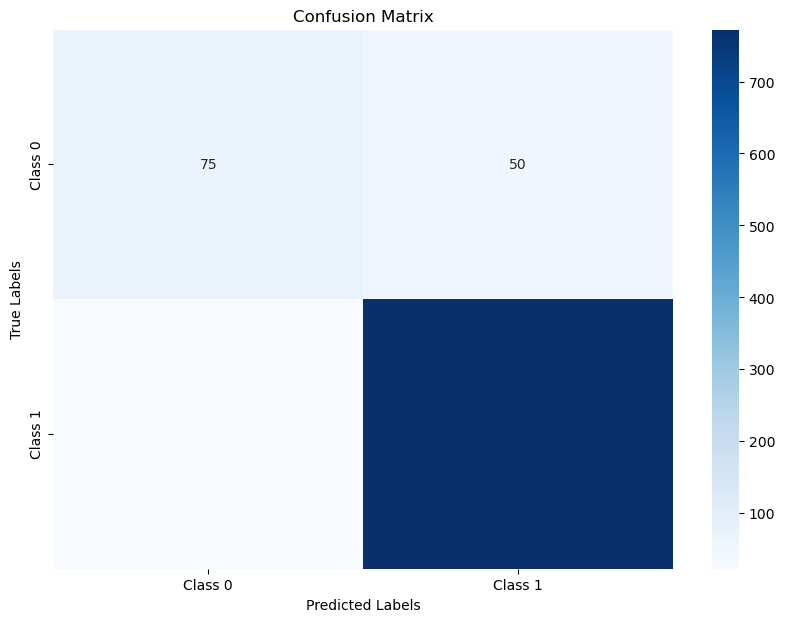

In [261]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `y_test` is the true labels and `y_pred` is the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


DIMENSIONALITY REDUCTION TO VISUALIZE CORRECT & INCORRECT PREDICTIONS

In [262]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Ensure y_test and y_pred are 1D arrays
if len(y_test.shape) > 1:
    y_test = y_test.ravel()
if len(y_pred.shape) > 1:
    y_pred = y_pred.ravel()

# Define the correct and incorrect indices
correct_indices = (y_test == y_pred)
incorrect_indices = (y_test != y_pred)

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Create a DataFrame for Plotly
df = pd.DataFrame(X_test_pca, columns=['PCA Component 1', 'PCA Component 2'])
df['Actual'] = y_test
df['Predicted'] = y_pred
df['Correct'] = correct_indices

# Map boolean values to strings for better visualization
df['Correct'] = df['Correct'].map({True: 'Correct', False: 'Incorrect'})

# Create the scatter plot
fig = px.scatter(df, x='PCA Component 1', y='PCA Component 2', color='Correct',
                 color_discrete_map={'Correct': 'blue', 'Incorrect': 'red'},
                 labels={'Correct': 'Prediction'},
                 title='Scatter Plot of Predictions with PCA')

fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)

fig.show()


The scatter plot visualizes the model's performance in a reduced dimensional space using PCA. Correct predictions are clustered together in blue, while incorrect predictions (green) are more dispersed, indicating potential areas for model improvement